In [39]:
import sys, importlib
from kNN_analytic import *
importlib.reload(sys.modules['kNN_analytic'])
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (12, 8)
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

(1e-06, 1.1)

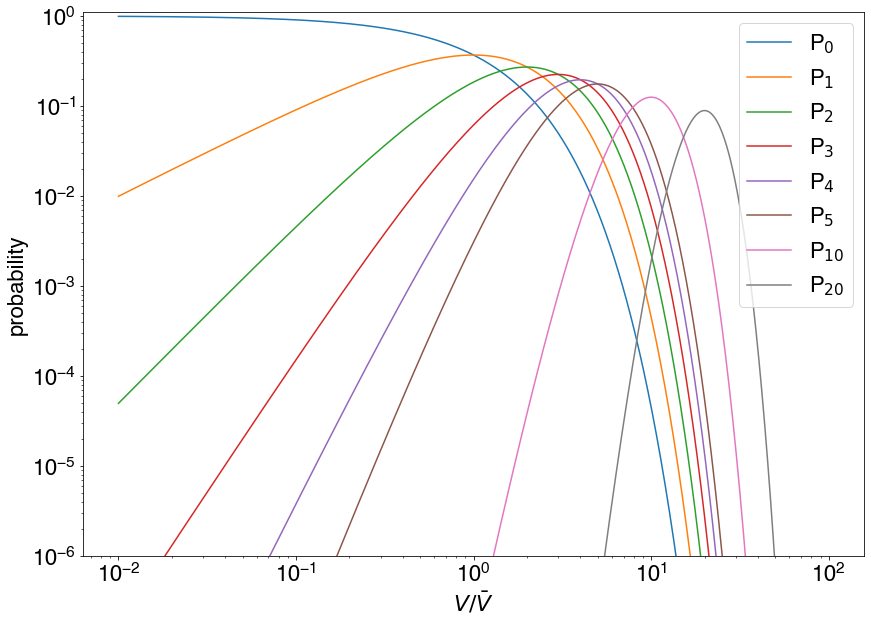

In [40]:
fig = plt.figure(figsize=((14,10)))
N = 1000
E = np.exp(1)
nV = np.logspace(-2,2,N)
sig = 2e-5*nV**(-0.5) # 
plt.loglog(nV, PG0(nV,sig), label=r"P$_0$")
plt.loglog(nV, PG1(nV,sig), label=r"P$_1$")
plt.loglog(nV, PG2(nV,sig), label=r"P$_2$")
plt.loglog(nV, PG3(nV,sig), label=r"P$_3$")
plt.loglog(nV, PG4(nV,sig), label=r"P$_4$")
plt.loglog(nV, PG5(nV,sig), label=r"P$_5$")
plt.loglog(nV, PG10(nV,sig), label=r"P$_{10}$")
plt.loglog(nV, PG20(nV,sig), label=r"P$_{20}$")
plt.legend();
plt.xlabel(r"$V/\bar{V}$")
plt.ylabel("probability")
plt.ylim(1e-6,1.1)

(1e-06, 1.1)

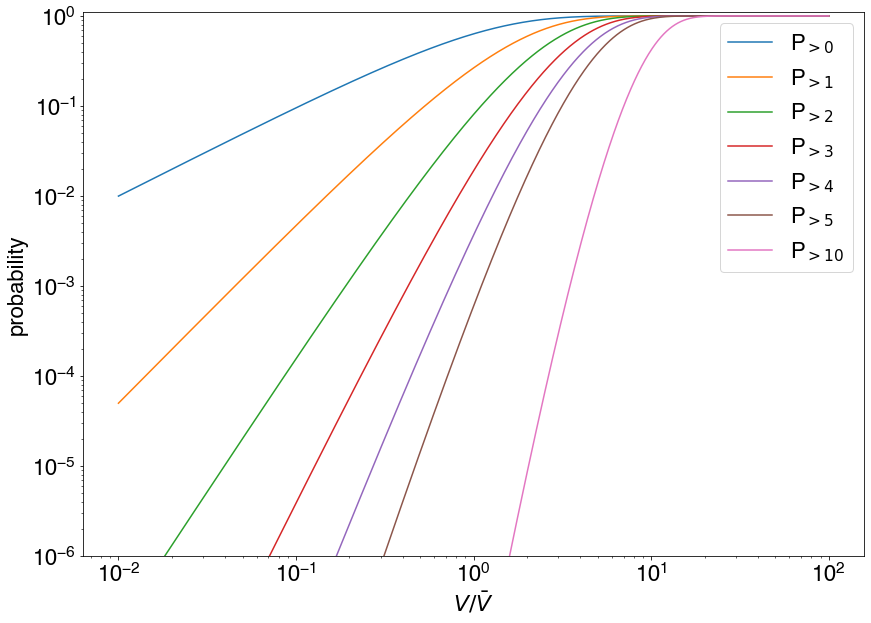

In [41]:
fig = plt.figure(figsize=((14,10)))
N = 1000
E = np.exp(1)
nV = np.logspace(-2,2,N)
sig = 2e-5*nV**(-0.5) # 
plt.loglog(nV, PGg0(nV,sig), label=r"P$_{>0}$")
plt.loglog(nV, PGg1(nV,sig), label=r"P$_{>1}$")
plt.loglog(nV, PGg2(nV,sig), label=r"P$_{>2}$")
plt.loglog(nV, PGg3(nV,sig), label=r"P$_{>3}$")
plt.loglog(nV, PGg4(nV,sig), label=r"P$_{>4}$")
plt.loglog(nV, PGg5(nV,sig), label=r"P$_{>5}$")
plt.loglog(nV, PGg10(nV,sig), label=r"P$_{>10}$")
plt.legend();
plt.xlabel(r"$V/\bar{V}$")
plt.ylabel("probability")
plt.ylim(1e-6,1.1)

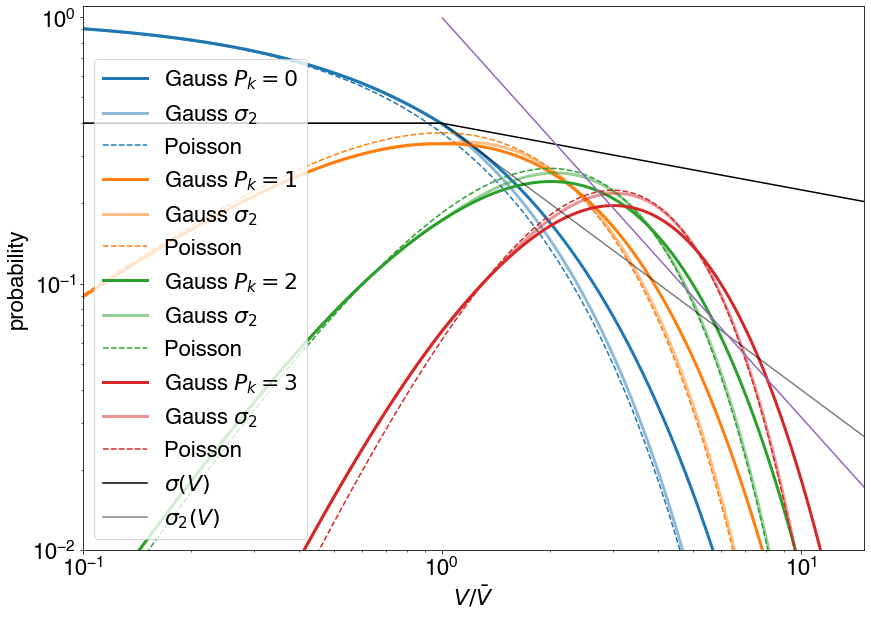

In [42]:

import warnings
#suppress warnings
warnings.filterwarnings('ignore')


sig = 4e-1*np.maximum(nV,1)**(-.25) # 
sig2 = 4e-1*np.maximum(nV,1)**(-1.) # 

fig = plt.figure(figsize=((14,10)))
ax = plt.gca()
for k in (0,1,2,3):
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(nV, np.abs(PGaussian(k,nV,sig)), lw=3, label="Gauss $P_{k}="+str(k)+"$",c=color)
    plt.loglog(nV, np.abs(PGaussian(k,nV,sig2)), lw=3,alpha=.5,c=color, label="Gauss $\sigma_2$")
    plt.loglog(nV, PPoisson(k,nV),'--',label="Poisson ",c=color)
plt.plot(nV,sig,color="black",label=r"$\sigma(V)$")
plt.plot(nV,sig2,color="black",alpha=.5,label=r"$\sigma_2(V)$")
plt.plot(nV[nV>1],nV[nV>1]**(-3/2))
plt.ylim(1e-2,1.1)
plt.xlim(1e-1,1.5e1)
plt.xlabel(r"$V/\bar{V}$")
plt.ylabel("probability")
plt.legend();

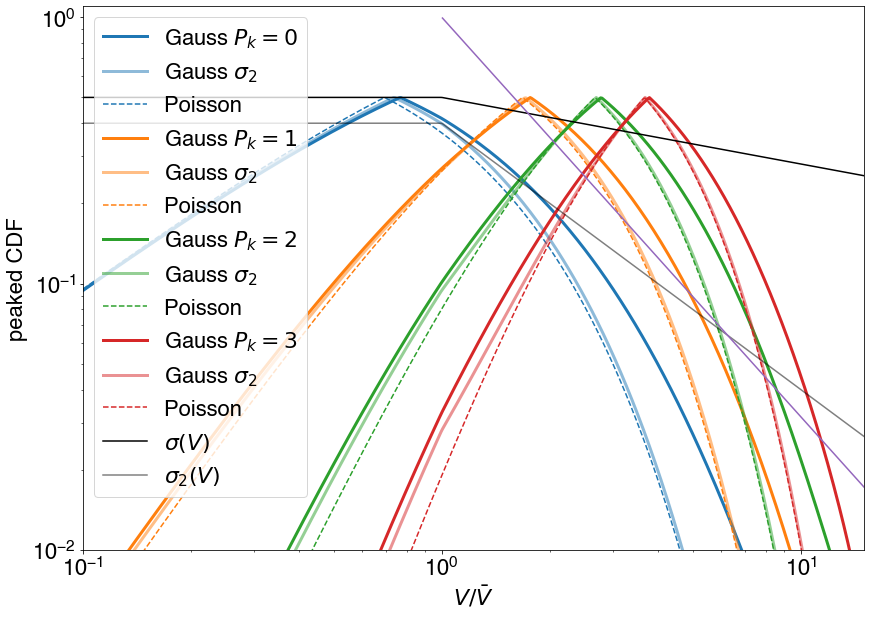

In [43]:

def peaked(v):
    return np.minimum(v, 1 - v)

import warnings
#suppress warnings
warnings.filterwarnings('ignore')


sig = 5e-1*np.maximum(nV,1)**(-.25) # 
sig2 = 4e-1*np.maximum(nV,1)**(-1.) # 

fig = plt.figure(figsize=((14,10)))
ax = plt.gca()
for k in (0,1,2,3):
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(nV, peaked(CDFGaussian(k,nV,sig)), lw=3, label="Gauss $P_{k}="+str(k)+"$",c=color)
    plt.loglog(nV, peaked(CDFGaussian(k,nV,sig2)), lw=3,alpha=.5,c=color, label="Gauss $\sigma_2$")
    plt.loglog(nV, peaked(CDFGaussian(k,nV,0)),'--',label="Poisson ",c=color)
plt.plot(nV,sig,color="black",label=r"$\sigma(V)$")
plt.plot(nV,sig2,color="black",alpha=.5,label=r"$\sigma_2(V)$")
plt.plot(nV[nV>1],nV[nV>1]**(-3/2))
plt.ylim(1e-2,1.1)
plt.xlim(1e-1,1.5e1)
plt.xlabel(r"$V/\bar{V}$")
plt.ylabel("peaked CDF")
plt.legend();

